# 31 Keras VGG16 Object Recognition

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

import sys
import time
import requests
import shutil

from IPython.display import Image, display

Using TensorFlow backend.


In [2]:
started = time.time()

print("%0.4f loading VGG16..." % (time.time() - started), file=sys.stderr)
model = VGG16(weights='imagenet')

0.0000 loading VGG16...


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
def predictions(filename_or_url="data/220px-MAN_M2000_Pritschenwagen.jpg", ext="jpg"):
    """
    Takes a filename or URL and run it through the model,
    ext only used for URL, which might not give away their format in the name.
    """
    started = time.time()
    if filename_or_url.startswith("http"):
        response = requests.get(filename_or_url, stream=True)
        with open('img.%s' % (ext), 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        del response
        img_path = out_file.name
        print("downloaded %s to %s" % (filename_or_url, img_path))
    else:
        img_path = filename_or_url
    
    print("%0.4f loading and resizing image" %
          (time.time() - started), file=sys.stderr)
    img = image.load_img(img_path, target_size=(224, 224))

    print("%0.4f preprocessing input..." %
          (time.time() - started), file=sys.stderr)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    print("%0.4f predict..." % (time.time() - started), file=sys.stderr)
    return model.predict(x)

In [5]:
def histo(p):
    return "|" * int(75*p)

In [8]:
def object_detection(filename_or_url="data/220px-MAN_M2000_Pritschenwagen.jpg"):
    if filename_or_url.startswith("http"):
        display(Image(url=filename_or_url))
    else:
        display(Image(filename=filename_or_url))

    preds = predictions(filename_or_url)
    
    for (_, name, p) in decode_predictions(preds, top=5)[0]:
        print("% 25s %0.4f %s" % (name, p, histo(p)))

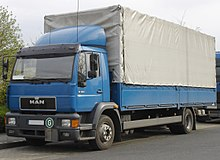

0.0000 loading and resizing image
0.0555 preprocessing input...
0.0585 predict...


               moving_van 0.6595 |||||||||||||||||||||||||||||||||||||||||||||||||
            trailer_truck 0.3047 ||||||||||||||||||||||
            garbage_truck 0.0341 ||
              mobile_home 0.0005 
     recreational_vehicle 0.0004 


In [9]:
object_detection()

In [10]:
object_detection("https://i.pinimg.com/originals/88/cf/46/88cf46d9c8952b2e50274dbf65996e5d.jpg")

downloaded https://i.pinimg.com/originals/88/cf/46/88cf46d9c8952b2e50274dbf65996e5d.jpg to img.jpg


0.2967 loading and resizing image
0.3387 preprocessing input...
0.3405 predict...


               greenhouse 0.2631 |||||||||||||||||||
                   cinema 0.0913 ||||||
                    stage 0.0799 |||||
            passenger_car 0.0756 |||||
                     pier 0.0437 |||


In [11]:
object_detection("http://www.zoo-wuppertal.de/typo3temp/pics/1ac0975569.jpg")

downloaded http://www.zoo-wuppertal.de/typo3temp/pics/1ac0975569.jpg to img.jpg


0.1845 loading and resizing image
0.1965 preprocessing input...
0.1983 predict...


                     lion 0.5740 |||||||||||||||||||||||||||||||||||||||||||
                   cougar 0.1513 |||||||||||
                  macaque 0.0851 ||||||
                    patas 0.0826 ||||||
                   baboon 0.0494 |||


In [12]:
object_detection("https://www.bergwelten.com/files/article/images/Regenbogen-Raffalt.jpg")

downloaded https://www.bergwelten.com/files/article/images/Regenbogen-Raffalt.jpg to img.jpg


0.4908 loading and resizing image
0.8752 preprocessing input...
0.8789 predict...


            mountain_tent 0.5514 |||||||||||||||||||||||||||||||||||||||||
                  volcano 0.1210 |||||||||
                 fountain 0.0455 |||
               car_mirror 0.0332 ||
                   geyser 0.0227 |


In [13]:
object_detection("https://upload.wikimedia.org/wikipedia/commons/2/28/Wuppertal_-_Die_Sonnenbergbr%C3%BCcke_%C3%BCber_die_A46_-_panoramio.jpg")

downloaded https://upload.wikimedia.org/wikipedia/commons/2/28/Wuppertal_-_Die_Sonnenbergbr%C3%BCcke_%C3%BCber_die_A46_-_panoramio.jpg to img.jpg


1.1967 loading and resizing image
1.4123 preprocessing input...
1.4136 predict...


        steel_arch_bridge 0.6348 |||||||||||||||||||||||||||||||||||||||||||||||
                     pier 0.0815 ||||||
                  viaduct 0.0582 ||||
                 lakeside 0.0453 |||
        suspension_bridge 0.0442 |||
